# PROYECTO DE SERIES TEMPORALES (M.Tomás Martinez)

![Walmart](https://www.mensjournal.com/.image/t_share/MjA2MTA3MjY0MjYyNjEyMTU3/prince-frederick-maryland-usa.jpg)

 **Problema:**

Hay muchas temporadas en las que las ventas son significativamente superiores o inferiores a las medias. Si la empresa no conoce estas temporadas, puede perder mucho dinero. Predecir las ventas futuras es uno de los planes más cruciales para una empresa. La previsión de las ventas da una idea a la empresa para organizar las existencias, calcular los ingresos y decidir hacer una nueva inversión. Otra ventaja de conocer las ventas futuras es que alcanzar los objetivos predeterminados desde el principio de las temporadas puede tener un efecto positivo en la cotización de las acciones y en la percepción de los inversores. Asimismo, no alcanzar el objetivo previsto podría perjudicar considerablemente la cotización de las acciones, a la inversa. Y, será un gran problema especialmente para Walmart como gran empresa.

**Objetivo:**

+ Mi objetivo en este proyecto es construir un modelo que prediga las ventas de las tiendas. Con este modelo, las autoridades de Walmart pueden decidir sus planes futuros, lo que es muy importante para organizar las existencias, calcular los ingresos y decidir si realizar nuevas inversiones o no.


Con una predicción precisa, la empresa puede determinar las demandas estacionales y tomar medidas al respecto.
Protegerse de las pérdidas de dinero, ya que la consecución de los objetivos de ventas puede tener un efecto positivo en el precio de las acciones y en la percepción de los inversores.
Prever los ingresos con facilidad y precisión gestionar los inventarios realizar campañas más eficaces

### 1eros Pasos

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
#Este archivo contiene datos adicionales relacionados con la tienda, el departamento y la actividad regional para las fechas dadas
features = pd.read_csv(r'C:\Users\Pc\Desktop\Proyectos\PROYECTOS\Facil\Analisis de Series Temporales + Prediccion\features.csv')

#Este fichero contiene información anonimizada sobre las 45 tiendas, indicando el tipo y el tamaño de la tienda:
stores = pd.read_csv(r'C:\Users\Pc\Desktop\Proyectos\PROYECTOS\Facil\Analisis de Series Temporales + Prediccion\stores.csv')

#Este archivo es idéntico a train.csv, salvo que hemos suprimido las ventas semanales.
test = pd.read_csv(r'C:\Users\Pc\Desktop\Proyectos\PROYECTOS\Facil\Analisis de Series Temporales + Prediccion\test.csv')

#Se trata de los datos históricos de entrenamiento, que abarcan desde 2010-02-05 hasta 2012-11-01.
train = pd.read_csv(r'C:\Users\Pc\Desktop\Proyectos\PROYECTOS\Facil\Analisis de Series Temporales + Prediccion\train.csv')

In [72]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [73]:
features.head(11)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [74]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Con los datos que se encuentran en Features podemos ver que se tiene 8190. La cual contiene la informacion de tiendas, el departamento y la actividad regional para las fechas dadas

In [75]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [76]:
stores.head(11)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [77]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [79]:
train.head(11)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


Este DataSet se divide en Periodos de Tiempo Semanales

In [80]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


# Data

In [81]:
# Uno los dataset de Train con Features y stores y creo un unico dataset llamado df para el posterior analisis
df = train.merge(features,how='left').merge(stores,how='left')
df.head(11)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [83]:
#Elimino las siguentes columnas ya que contienen muchos datos faltantes y son irrelevantes para el analisis 
df = df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)


In [84]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


1. **Store**: Identificador único para cada tienda en el conjunto de datos. Permite diferenciar las ventas y otras métricas por tienda.

2. **Dept**: Identificador único para cada departamento dentro de las tiendas.

3. **Date**: Fecha de la semana en la que se registraron las ventas.

4. **Weekly_Sales**:Ventas semanales registradas para una tienda y un departamento específicos.

5. **IsHoliday**: Indicador booleano que señala si la semana incluye un día festivo.

6. **Temperature**:Temperatura promedio de la región durante la semana.

7. **Fuel_Price**:Precio del combustible en la región durante la semana.

8. **CPI (Consumer Price Index)**:Índice de Precios al Consumidor en la región durante la semana.

9. **Unemployment**:Tasa de desempleo en la región durante la semana.

10. **Type**:Tipo de tienda (por ejemplo, A, B, C), que clasifica las tiendas según su tamaño, ubicación, o características.

11. **Size**:Tamaño de la tienda, tiendas más grandes pueden tener más capacidad para ventas, por lo que el tamaño es un factor relevante para predecir ventas.


In [86]:
#Cambio a Fecha y su Respectiva Unidad

"""
CON EL METODO APPLY

df['Date']= df['Date'].apply(pd.to_datetime)

def año(x):
    return x.strftime('%Y')
df['Año']= df['Date'].apply(año)

def mes(x):
    return x.strftime('%m')
df['Mes']= df['Date'].apply(mes)
    
def dia(x):
    return x.strftime('%d')
df['Dia']=df['Date'].apply(dia)
    """

"\nCON EL METODO APPLY\n\ndf['Date']= df['Date'].apply(pd.to_datetime)\n\ndef año(x):\n    return x.strftime('%Y')\ndf['Año']= df['Date'].apply(año)\n\ndef mes(x):\n    return x.strftime('%m')\ndf['Mes']= df['Date'].apply(mes)\n    \ndef dia(x):\n    return x.strftime('%d')\ndf['Dia']=df['Date'].apply(dia)\n    "

In [87]:
#MANUPULACION DE FECHAS CON PANDAS

df['Dia'] = pd.DatetimeIndex(df['Date']).day
df['Mes'] = pd.DatetimeIndex(df['Date']).month
df['Año'] = pd.DatetimeIndex(df['Date']).year

+ El método apply con una función personalizada es más flexible pero generalmente más lento, mientras que el uso de pd.DatetimeIndex es más eficiente pero menos flexible.

+ Si solo necesitas extraer componentes simples como el año, mes o día, el uso de pd.DatetimeIndex es más adecuado. Si planeas hacer manipulaciones más complejas de las fechas, el uso de una función personalizada con apply puede ser más útil.

In [88]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dia,Mes,Año
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,10,2012
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,192.308899,8.667,B,118221,26,10,2012


# Analisis 

## Descriptivo

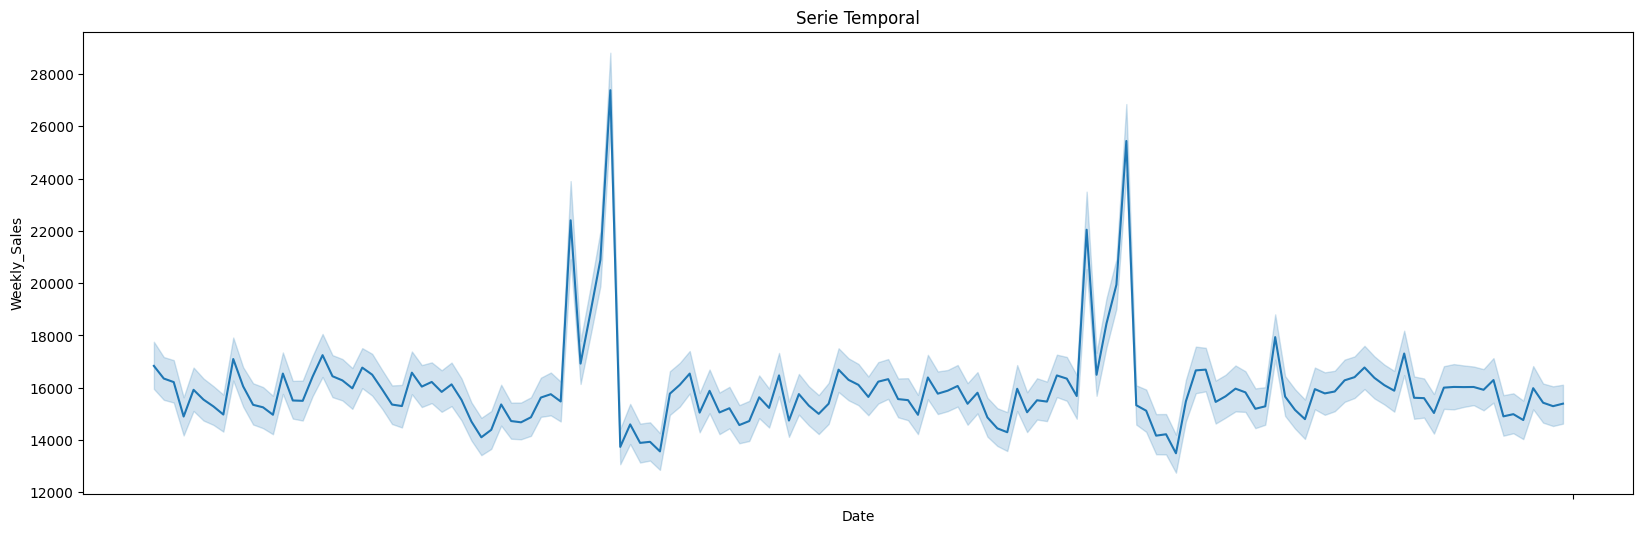

In [89]:
# Grafico de linea de tiempo con Date y Weekly_Sales con esto se muestra los ingresos a lo largo de los años 
fig, ax = plt.subplots(figsize= (20,6)) #Figura del grafico

ax = sns.lineplot(data=df,x='Date',y='Weekly_Sales') #Tipo de grafico y sus respectivas caracteristicas 
ax.set_title('Serie Temporal') #titulo
ax.set_xticks('') # Para mejorar la legeibilidad del grafico opte por dejarlo asi. Dado que mas en proximo graficos se muestra mejor
plt.show()

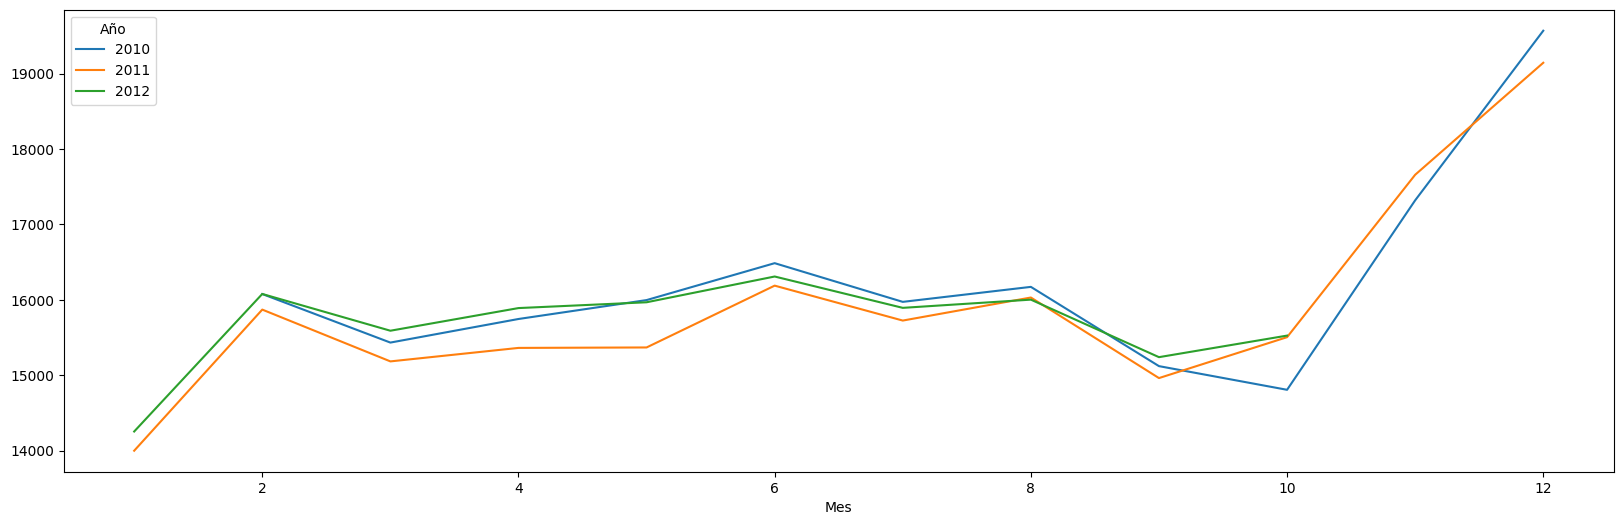

In [90]:
#¿Qué es una Tabla Pivote?
#Una tabla pivote es una herramienta que te permite reorganizar y resumir datos seleccionando ciertas columnas para agrupar y otras para aplicar alguna operación,
#como sumas, promedios, etc. 
#En pandas, pd.pivot_table se usa para crear estas tablas de manera flexible.

Mes = pd.pivot_table(df,values='Weekly_Sales',columns='Año',index='Mes') #Llevo el anasis de serie de tiempo a meses y diferentes años
Mes.plot(figsize=(20,6))
plt.show()

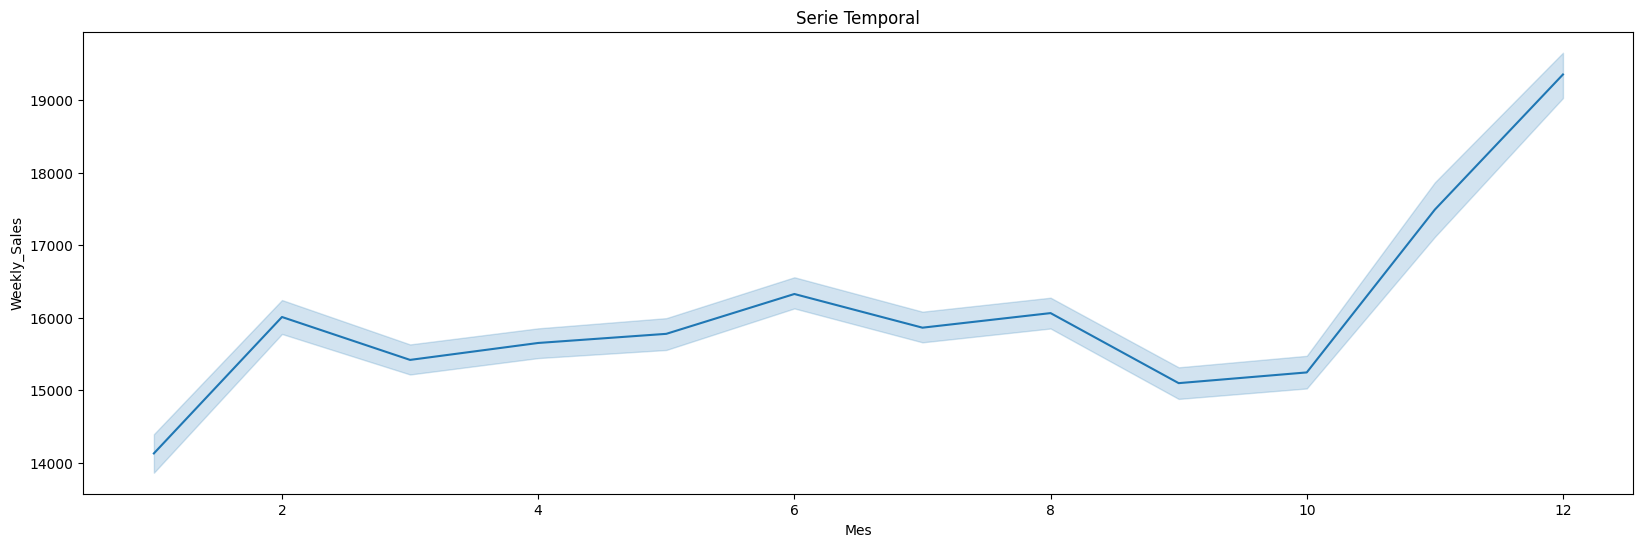

In [91]:
fig, ax = plt.subplots(figsize= (20,6)) #figura del grafico
ax = sns.lineplot(data=df,x='Mes',y='Weekly_Sales') #Tipo de grafico y sus respectivas caracteristicas
ax.set_title('Serie Temporal')#Titulo
plt.show()

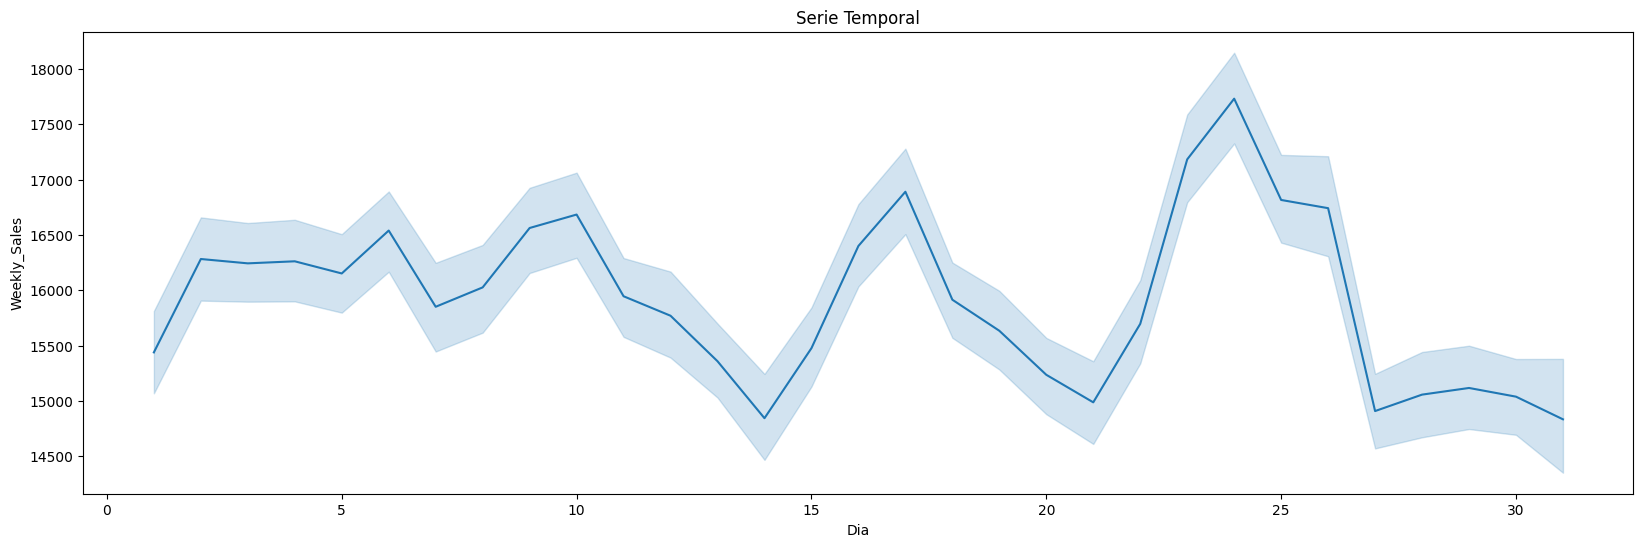

In [92]:
fig, ax = plt.subplots(figsize= (20,6))
ax = sns.lineplot(data=df,x='Dia',y='Weekly_Sales')
ax.set_title('Serie Temporal')
plt.show()

###   **Conclusiones de las Series de Tiempo:**

1.  Primer punto a tener en cuenta es que la tendencia a lo largo del tiempo para las lineas de tiempo(para estos 3 años) se mantiene Constante, es decir una estabilidad en la ventas(No aumento pero tampoco declive en las mismas)

2.  Existen a lo largo de los años puntos de inflexión como lo es a partir de Noviembre en donde las compras aumentan notablemente en todos los años. Esto se da pues, los dias festivos como los son para USA el dia de accion de gracia(28 de noviembre), Navidad(24 de diciembre), Año Nuevo(1 de Enero) como asi tambien los dias de grandes ofertas como lo son Black Friday(29 de Noviembre) se encuentran en este periodo del tiempo, por lo que las ventas que se realizan son mayores. Ademas sabiendo esto es normal que la empresa realice mayores ofertas, promociones,etc.

3. A su vez ese pico que existe en esos meses va acompañado ademas con un declive abructo de los ingresos(Esto para el mes de Enero), en donde las ventas bajan ya que, en enero están tratando de ahorrar un poco, lo que hace que las ventas caigan, muchos prefieren tomarse un respiro y gastar menos en enero para recuperar sus finanzas, ademas enero es cuando muchos se ponen metas financieras, como ahorrar más y gastar menos, lo que afecta las ventas.

4. La Estacionalidad en este sentido como anteriormente se dijo vemos una constante en la ventas a lo largo del año seguido por 2 meses de picos de ventas y su respectiva caida luego de estos dos meses


**Consideraciones:**

1. **Impacto de las Promociones y Ofertas**: Las promociones y descuentos durante los Picos son altamente efectivos para aumentar las ventas. La empresa podría considerar extender o repetir promociones en otros momentos del año para equilibrar las ventas.

2. **Planificación y Estrategia**: La estabilidad general de las ventas durante el año sugiere que la empresa tiene una base de clientes leales, pero también indica una falta de crecimiento. Para mejorar esto, podrían explorarse nuevas estrategias de marketing o expansión de productos para atraer a nuevos clientes o aumentar la frecuencia de compra de los clientes existentes.

3. **Preparación para la Temporada Baja**: Dado que enero siempre muestra una caída significativa en las ventas, la empresa podría beneficiarse de una mejor planificación de inventario y estrategias de marketing que fomenten el gasto en el nuevo año. Ofrecer descuentos de Año Nuevo o lanzar nuevos productos en enero podría ayudar a mitigar esta caída.


# EDA

In [93]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dia,Mes,Año
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,26,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,28,9,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,5,10,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,12,10,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,19,10,2012


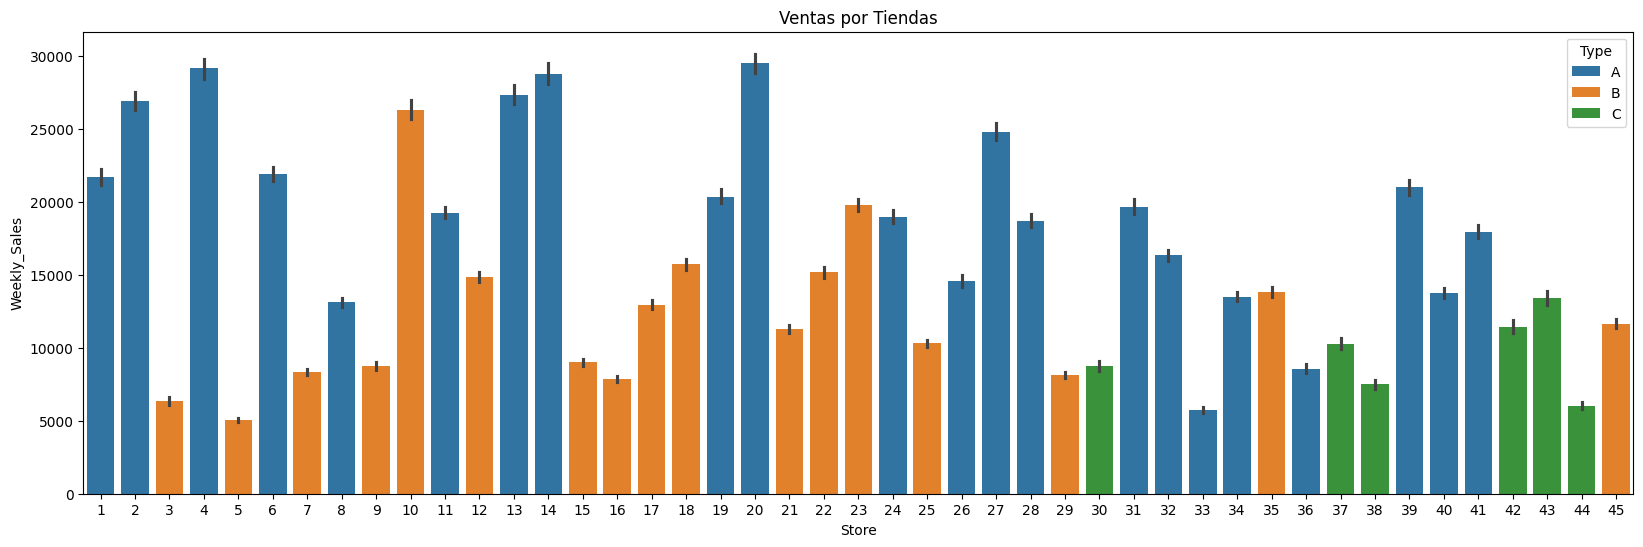

In [94]:
# Para este grafcio quiero mostrar las diferentes Ventas por tienda y ademas etiquetadas por los diferentes tipos de tienda
fig, ax = plt.subplots(figsize= (20,6))
ax = sns.barplot(data=df,x= 'Store', y='Weekly_Sales',hue='Type')#Tipo de grafico y sus respectivas caracteristicas
ax.set_title('Ventas por Tiendas')
plt.show()

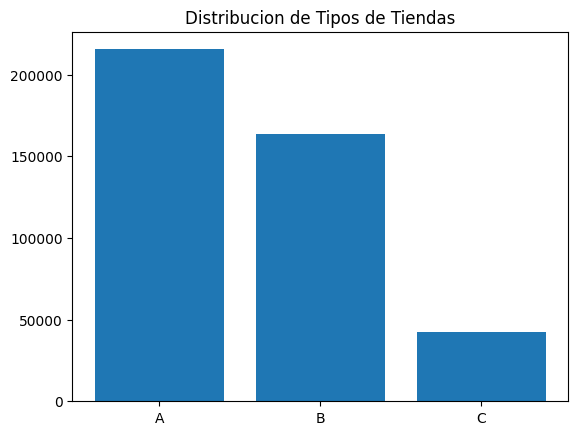

In [95]:
Type_x = df['Type'].unique()
Type_y = df['Type'].value_counts()

#Muestro las distribucion de los distintos tipos de tiendas
ax=plt.subplots
plt.bar(Type_x,Type_y)
plt.title('Distribucion de Tipos de Tiendas')
plt.show()

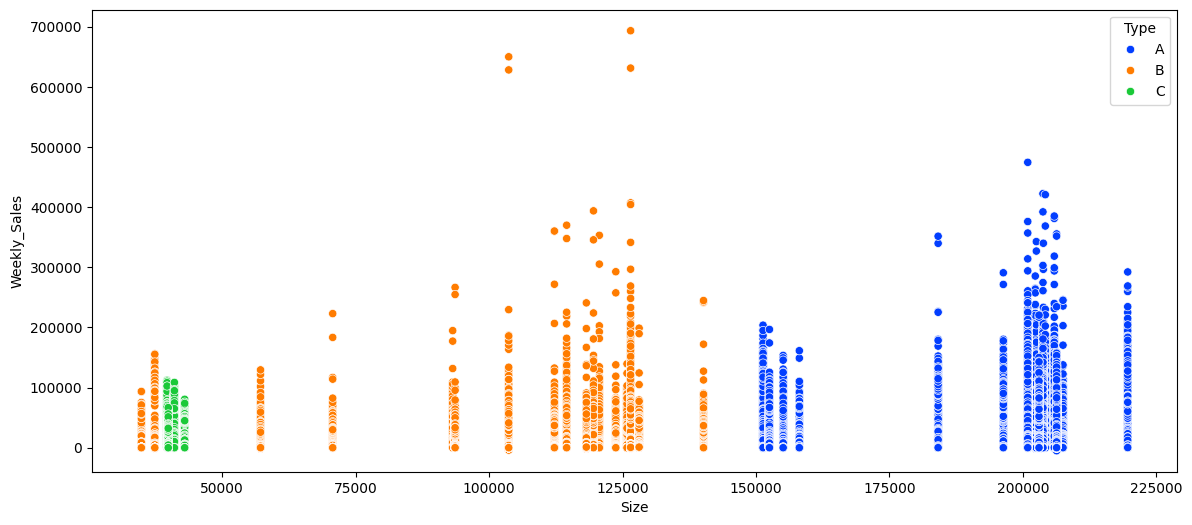

In [96]:
#Relacion de ingresos y el tamaño de la tienda
plt.figure(figsize=(14,6))
ax= sns.scatterplot(data=df,x='Size',y='Weekly_Sales',hue='Type',palette='bright')

In [97]:
# Datos especificos de los Picos de Compras del Grafico anterior
df.loc[df['Weekly_Sales']>500000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Dia,Mes,Año
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,126.669267,9.003,B,126512,26,11,2010
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,129.836400,7.874,B,126512,25,11,2011
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,136.689571,8.763,B,103681,26,11,2010
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,140.421786,8.745,B,103681,25,11,2011


Para los Picos de Compras podemos ver que:

+   Se hacen en la mismas Epocas del Año
+   Las 4 compras se efectuan tambien en dias de Feriados/Promociones
+   En tiendas de tipo B
+   En el Departamento 72

**Nuestros datos reflejan que hay una correlacion entre la cantidad de tiendas que tiene de cierto tipo y su cantidad de ventas.**

+ Tenemos a las tindas de tipo C con menos de 50.000 tiendas y eso repercute ademas en su ventas(Ademas estas tiendas son de menor tamaño, caracteristicas y se encuentran en una ubicacion más desfavorable comercialmente)

+ Para las tiendas de Tipo B vemos que las mismas cuentan con un poco más de 15.0000 sucursales, pero en estas se encuentran los picos de compras superandado ampliamente y varias veces al pico de compras para las tiendas de tipo A

+ Las tiendas de tipo A son la que mayor flujo de compras tienen para nuestras empresa, dado como se dijo anteriormente a mayor tamaño y mejor ubicacion y caracteristicas se venden tambien en mayores cantidades, pues este tipo de tiendas da la opcion a mayor flujo de clientes. Tambien se puede dar a que al tratarse de tiendas más grandes la variedad de productos es proporcional

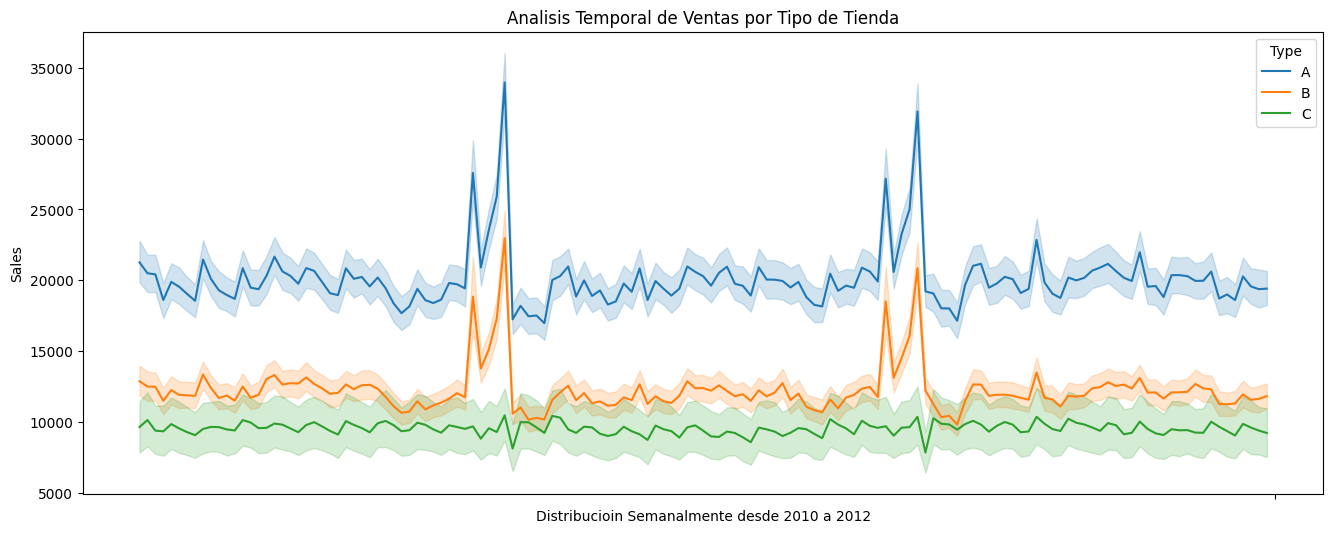

In [98]:
#Cómo varían las ventas a lo largo del tiempo en diferentes tiendas

plt.figure(figsize=(16,6))
ax= sns.lineplot(data=df,x='Date',y='Weekly_Sales',hue='Type')
ax.set_title('Analisis Temporal de Ventas por Tipo de Tienda')
ax.set_xticks('')
ax.set_xlabel('Distribucioin Semanalmente desde 2010 a 2012')
ax.set_ylabel('Sales')

plt.show()


+ Se percibe una equitativa distribucion de la ventas en comparacion con los graficos que cuentan con todas las tiendas en conjunto. Es decir los diferentes tipos de tiendas no tienen ningun compratamiento particular a comparacion con los graficos anteriores, por lo que podemos apreciar que es un comportamiento esperado.

+ Vemos que la tiendas de tipo A y B comparten mismos compratamiento a lo largo del tiempo con sus picos y sus bajas, eso si con sus respectivo flujo de compras(Analisis anterior)

+ Para las tiendas de tipo C vemos que existe cierta Estacionalidad, no tiene grandes picos como los otros tipos de tiendas ni grandes caidas, para los meses de Octubre-Enero. Se percibe una constante en el flujo de compras y ingresos para este tipo de tiendas, por los que la dota de cierta seguridad para la empresa a pesar de sus bajas ventas y ingreso en comparacion con las demas tipos de tiendas.

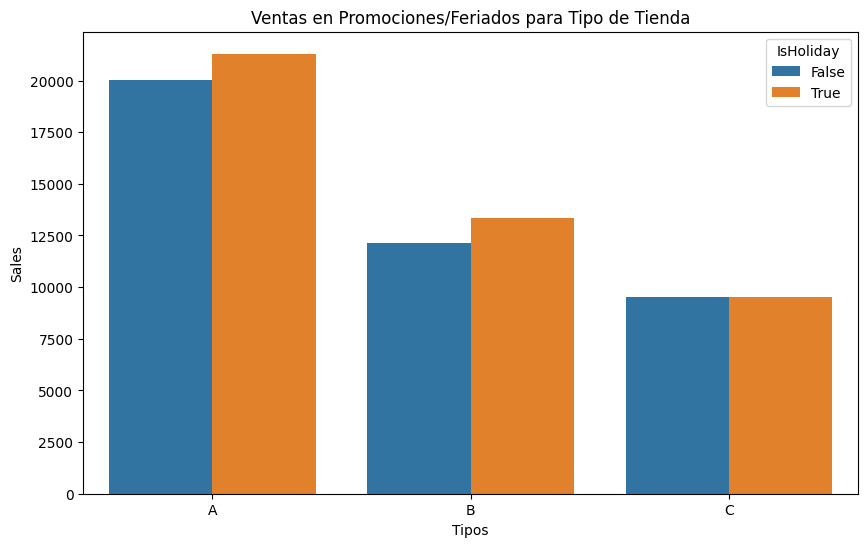

In [99]:
#Impacto de los Feriados y Promociones en las Ventas

ofertas = df.groupby(['IsHoliday','Type']).agg({'Weekly_Sales': 'mean'}).reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=ofertas,x='Type',y='Weekly_Sales',hue='IsHoliday')
ax.set_title('Ventas en Promociones/Feriados para Tipo de Tienda')
ax.set_xlabel('Tipos')
ax.set_ylabel('Sales')
plt.show()

+ Para los dias de Promociones y Feriados nuestra empresa genera más ganancia que lo habitual, excepto por los tipos de tiendas 'C'

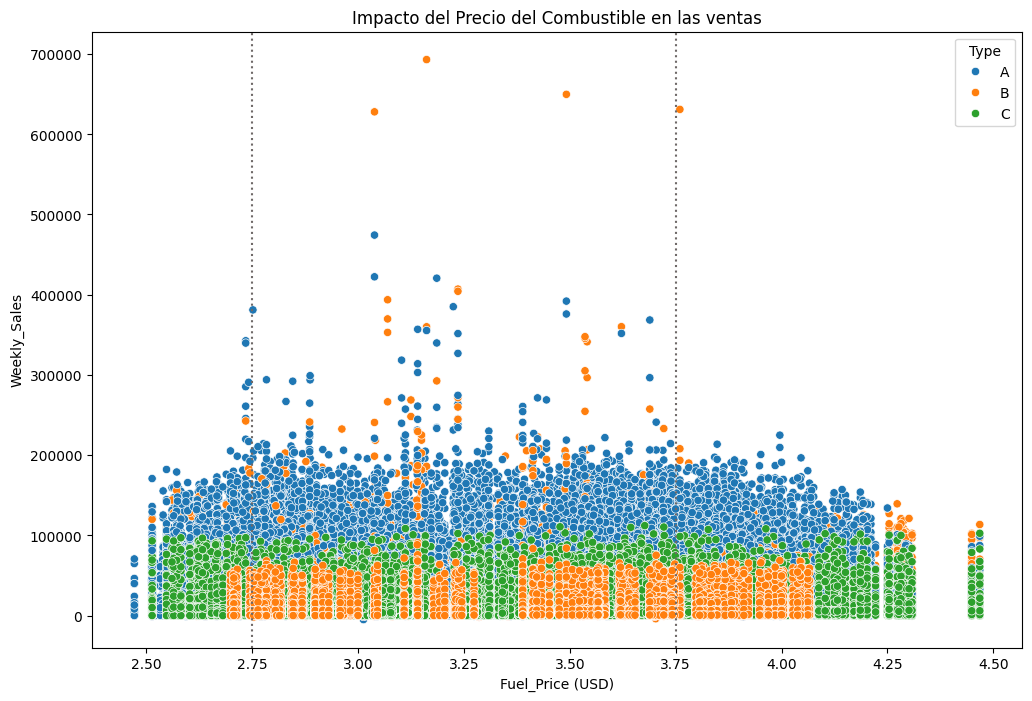

In [100]:
# ¿Que impacto tiene el combustible y su precio en la ventas de la empresa?

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df,x='Fuel_Price',y='Weekly_Sales',hue='Type')

ax.set_title('Impacto del Precio del Combustible en las ventas')
ax.set_xlabel('Fuel_Price (USD)')

plt.axvline(x=2.75,linestyle=':', color= '#6f6968')
plt.axvline(x=3.75 , linestyle=':',color= '#6f6968')

plt.show()

+ La Mayor cantidad de compras asi como tambien de sus mayores importes se encuentran en la brecha en la cual el precio del Combustible se encuentran ente $2,75 y $3,75

+ Tiene mayor importancia la Epoca del año que el Precio del Combustible en los Ingresos de la empresa

+ Luego vemos que precios menores y mayores del combustibles, se encuetran por debajo de los $20.0000 de ingresos. 

+ Se refelja tambien un corportamiento en la cual a mayor es el precio del combustible menos ingreso hay de tiendas de tipo A 

+ Como ya hemos vistos los importes mayores de ingresos vienen de tiednas de tipo A y B(Se refleja ademas la constante de las tiednas tipo B) 

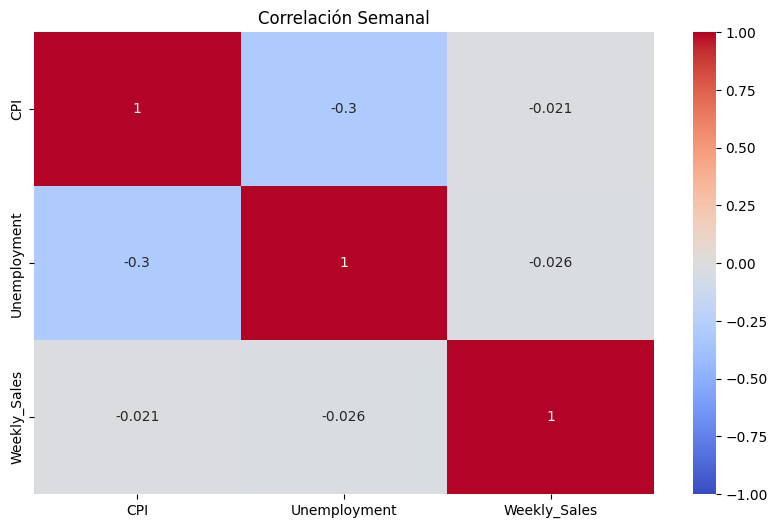

In [101]:
#¿El Índice de Precios al Consumidor(CPI) y la tasa de desempleo, puede tener un impacto significativo en las ventas de las tiendas?

correlacion = df[['CPI', 'Unemployment', 'Weekly_Sales']].corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlación Semanal')
plt.show()



Dado los resultados en los cuales no se ve correlacion alguna me surgio la duda de que si esto pasó dado que el periodo de tiempo en este analisis es semanalmente por lo que no se podria notar una correlacion significativa. Quiza a corto plazo no se nota una correlacion pero...

**¿Y si en vez de ventas semanales lo hago trimestrales?**

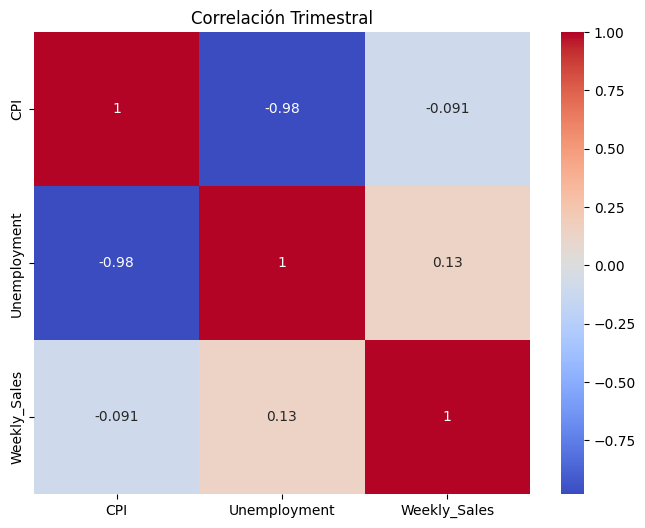

In [102]:
df2 = df

df2['Date'] = pd.to_datetime(df2['Date'])


df2['Year'] = df2['Date'].dt.year
df2['Quarter'] = df2['Date'].dt.to_period('Q')
df_trimestral = df2.groupby(['Year', 'Quarter']).agg({'Weekly_Sales': 'mean', 'CPI': 'mean', 'Unemployment': 'mean'}).reset_index()

correlation_trimestal = df_trimestral[['CPI', 'Unemployment', 'Weekly_Sales']].corr(method='pearson')


fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data=correlation_trimestal, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlación Trimestral')
plt.show()


+ Hay una fuerte correlación negativa (-0.98) entre CPI y la tasa de desempleo, lo que indica que a medida que el CPI aumenta, la tasa de desempleo tiende a disminuir, y viceversa. Este tipo de relación es común en la economía, donde un aumento en los precios puede estar relacionado con un menor desempleo debido a una mayor actividad económica.

+ La correlación entre el CPI y las ventas semanales sigue siendo baja (-0.09), lo que sugiere que, incluso en un periodo trimestral, no hay una relación fuerte entre el índice de precios al consumidor y las ventas.

+ La correlación entre el desempleo y las ventas semanales es aún baja (0.13), pero es más alta que en el análisis semanal. Esto podría sugerir que, a lo largo de trimestres, el desempleo tiene un ligero impacto en las ventas, aunque sigue siendo una correlación débil.

+ **Conclusion:**

 Aun cuando la correlación ha cambiado ligeramente en el análisis trimestral, la relación entre los factores demográficos (CPI y Unemployment) y las ventas sigue siendo débil, lo que sugiere que otros factores podrían estar influyendo más en las ventas de las tiendas.

In [103]:
#Preprocesameitno de los datos
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.index.duplicated().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Dia             0
Mes             0
Año             0
Year            0
Quarter         0
dtype: int64
0
0


# Modelado

## ARIMA (AutoRegressive Integrated Moving Average)

Antes de aplicar ARIMA, es fundamental realizar un análisis de estacionariedad y de autocorrelación para entender mejor la naturaleza de tus datos y asegurarte de que el modelo ARIMA sea adecuado.

 1. **Análisis de Estacionariedad**
La estacionariedad implica que las propiedades estadísticas de la serie, como la media y la varianza, no cambian con el tiempo. ARIMA funciona mejor con series estacionarias, así que es importante verificar si los datos lo son.

- **Dickey-Fuller Test (ADF Test):** Este test es una prueba común para verificar la estacionariedad. Si el p-valor del test es menor que 0.05, rechazas la hipótesis nula de que la serie tiene una raíz unitaria, lo que indica que es estacionaria.

 2. **Análisis de Autocorrelación**
- **ACF (Autocorrelation Function):** Esto mide la correlación entre la serie temporal y sus retardos (lags). Es útil para identificar la estructura temporal de tus datos.
  
- **PACF (Partial Autocorrelation Function):** Similar al ACF, pero controla la influencia de los lags intermedios, lo que te ayuda a determinar el orden AR (AutoRegresivo) del modelo ARIMA.

**Prueba de Dickey-Fuller aumentada**

La prueba Dickey-Fuller aumentada considera como hipótesis nula que la serie temporal tiene una raíz unitaria, una característica frecuente de las series temporales no estacionarias. Por el contrario, la hipótesis alternativa (bajo la cual se rechaza la hipótesis nula) es que la serie es estacionaria.

Hipótesis nula (HO): La serie tiene una raíz unitaria, no es estacionaria.

Hipótesis alternativa (HA): La serie no tiene raíz unitaria, es estacionaria.

Dado que la hipótesis nula supone la presencia de una raíz unitaria, el p-value obtenido debe ser inferior a un nivel de significación determinado, a menudo fijado en 0.05, para rechazar esta hipótesis. Este resultado indica la estacionariedad de la serie. La función adfuller() de la biblioteca Statsmodels permite aplicar la prueba ADF. Su resultado incluye cuatro valores: el p-value, el valor del estadístico, el número de retardos (lags) incluidos en la prueba y los umbrales del valor crítico para tres niveles diferentes de significancia.

In [104]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Weekly_Sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie no es estacionaria (no rechazamos la hipótesis nula).")



ADF Statistic: -31.988781724011744
p-value: 0.0
Critical Values: {'1%': -3.4303655154786736, '5%': -2.861546857656134, '10%': -2.5667736500803486}
La serie es estacionaria (rechazamos la hipótesis nula).


**Función de autocorrelación (ACF)**

La ACF calcula la correlación entre una serie temporal y sus valores retardados (lags). 

En el contexto de la modelización ARIMA, una caída brusca de la ACF después de unos pocos retardos indica que los datos tienen un orden autorregresivo finito. El retardo en el que cae la ACF proporciona una estimación del valor de  q.

Si el ACF muestra un patrón sinusoidal o sinusoidal amortiguado, sugiere la presencia de estacionalidad y requiere la consideración de órdenes estacionales además de órdenes no estacionales.

**Función de autocorrelación parcial (PACF)**

La PACF mide la correlación entre un valor retardado (lag) y el valor actual de la serie temporal, teniendo en cuenta el efecto de los retardos intermedios. 

En el contexto de la modelización ARIMA, si la PACF se corta bruscamente después de un determinado retardo, mientras que los valores restantes están dentro del intervalo de confianza, sugiere un modelo AR de ese orden.

El desfase en el que se corta el PACF da una idea del valor de  p.

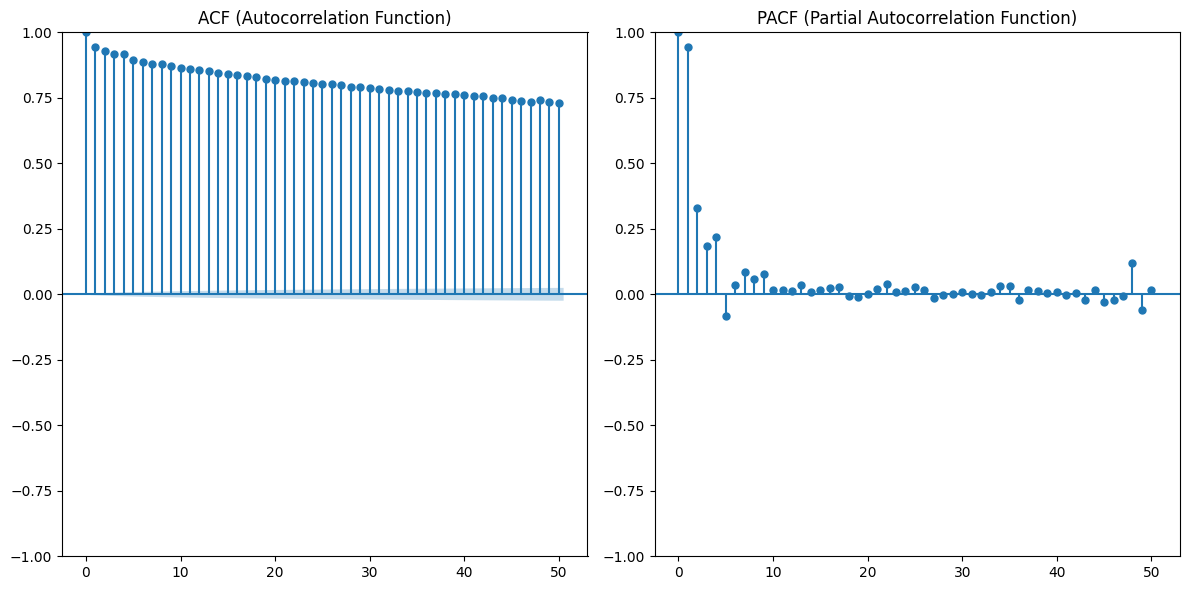

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Weekly_Sales'], ax=plt.gca(), lags=50)
plt.title('ACF (Autocorrelation Function)')

plt.subplot(122)
plot_pacf(df['Weekly_Sales'], ax=plt.gca(), lags=50)
plt.title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()


+ En el gráfico ACF se ve un decaimiento lento y gradual, es una señal de no estacionariedad.

+ El PACF muestra un corte abrupto después de un cierto lag (es decir, los valores caen cerca de cero y permanecen allí), ese lag es un buen candidato para el valor de 𝑝. 

+ El corte ocurre en lag 2 , el modelo ARIMA podría requerir un p= 2


**Valores:**

p = 2 (según el PACF)

d = 0 (la serie es estacionaria)

q = 1 (según el ACF)

ARIMA es un modelo utilizado para predecir series temporales. Combina tres componentes:
1. **AR (AutoRegresión):** La predicción depende de valores pasados de la misma serie.
2. **I (Integración):** Diferenciación de la serie para hacerla estacionaria (donde las estadísticas no cambian con el tiempo).
3. **MA (Media Móvil):** La predicción depende del error de predicciones anteriores.

ARIMA modela la serie temporal como una combinación de sus valores pasados y el error de predicciones previas. Es útil para series temporales univariadas y para predecir datos futuros con base en patrones observados.

In [106]:
# Ver que las fechas esten ordenadas
df = df.sort_index()

# sin fechas duplicadas
df = df.loc[~df.index.duplicated(keep='first')]


In [107]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA con los parámetros que vimos anterioremente en las metricas 
model = ARIMA(df['Weekly_Sales'], order=(1, 0, 1)) #Probando en diferentes ocasiones estos dieron mejores resultados 
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:               421570
Model:                 ARIMA(1, 0, 1)   Log Likelihood            -4319042.090
Date:                Mon, 19 Aug 2024   AIC                        8638092.181
Time:                        12:06:16   BIC                        8638135.988
Sample:                             0   HQIC                       8638104.671
                             - 421570                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.598e+04    666.483     23.978      0.000    1.47e+04    1.73e+04
ar.L1          0.9881      0.000   8603.833      0.000       0.988       0.988
ma.L1         -0.4983      0.000  -2745.138      0.0

### Interpretación

1. **Coeficientes del Modelo**:
   - **const**: Es el valor medio de la serie cuando todos los efectos de AR y MA se han eliminado.
   - **ar.L1**: Un valor de 0.9881 sugiere una fuerte dependencia en la serie temporal. Casi toda la variación en el valor actual está explicada por el valor del período anterior.
   - **ma.L1**: Un valor de -0.4983 indica que hay un efecto de corrección hacia la media basado en el error del período anterior.

2. **Estadísticas de Ajuste**:
   - **Log Likelihood**: Un valor muy negativo puede indicar que el modelo tiene un gran número de parámetros o que el ajuste es muy inexacto.
   - **AIC, BIC, HQIC**: Estos valores se utilizan para comparar modelos. Un AIC y BIC más bajos indican un modelo mejor en términos de ajuste y complejidad. Dado que tus valores son bastante altos, puede ser útil comparar estos con otros modelos que has probado.

3. **Estadísticas de Prueba**:
   - **Ljung-Box (Q)**: El p-valor es 0.00, lo que sugiere que hay autocorrelación en los residuos del modelo, lo cual podría indicar que el modelo no captura toda la estructura temporal de los datos.
   - **Jarque-Bera (JB)**: El p-valor es 0.00, lo que indica que los residuos no se distribuyen normalmente. Esto puede ser una señal de que el modelo no está capturando adecuadamente la estructura de los datos.
   - **Heteroskedasticity (H)**: El p-valor es 0.00, lo que sugiere que hay heterocedasticidad en los residuos (variación no constante a lo largo del tiempo).
   - **Skew y Kurtosis**: Valores extremos indican que la distribución de los residuos es asimétrica y tiene colas pesadas, lo cual confirma la falta de normalidad en los residuos.

### Conclusiones

- **Ajuste del Modelo**: El modelo ARIMA que has ajustado muestra algunas limitaciones, como autocorrelación en los residuos, falta de normalidad, y heterocedasticidad. Estas son señales de que el modelo puede no estar capturando toda la dinámica de la serie temporal.

- **Siguientes Pasos**: Considera ajustar el modelo con diferentes parámetros o usar otros enfoques, como modelos SARIMA si hay estacionalidad o modelos más complejos si es necesario. También podrías revisar si hay transformaciones necesarias para los datos o ajustar la estructura del modelo para mejorar el ajuste.

## Prophet



Prophet es un modelo desarrollado por Facebook para series temporales con datos estacionales y tendencias de largo plazo. Es flexible, fácil de usar, y maneja automáticamente aspectos como la estacionalidad, los días festivos y los cambios de tendencia. 

Prophet es especialmente útil cuando tienes datos con patrones estacionales fuertes o cuando quieres incluir efectos de feriados y eventos específicos en tus predicciones.

12:07:07 - cmdstanpy - INFO - Chain [1] start processing
12:07:27 - cmdstanpy - INFO - Chain [1] done processing


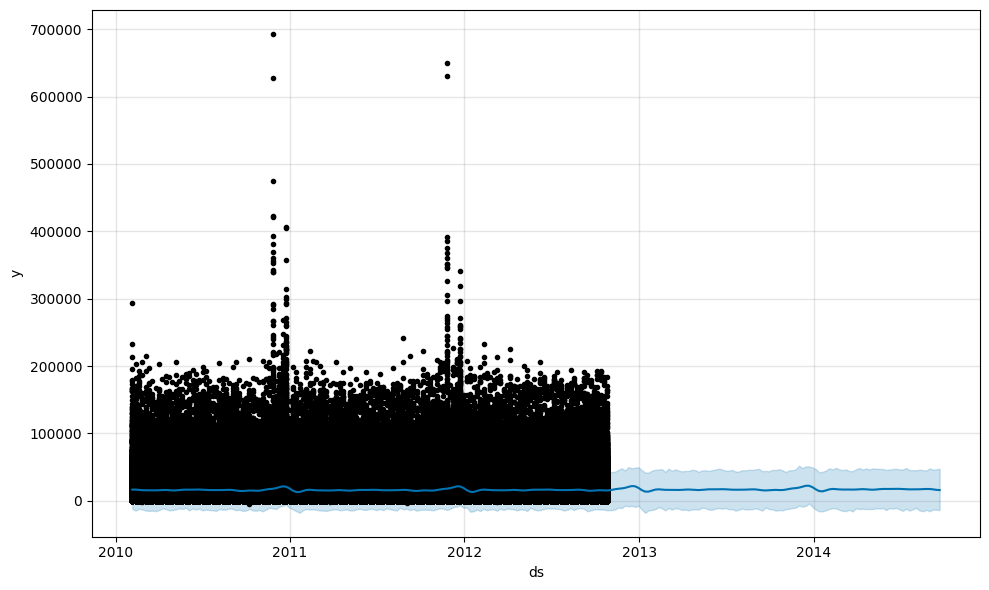

In [108]:
df_P = df #Creo otro DataFrame

from prophet import Prophet

df_P.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

df_P['ds'] = pd.to_datetime(df_P['ds'])

modelo = Prophet()
modelo.fit(df_P)

# Le doy al modelo fechas futuras para probar su evaluacion en este caso le doy 100 semanas casi 2 años de predicciones
futuro = modelo.make_future_dataframe(periods=100, freq='W')
prediccion = modelo.predict(futuro)

#Resultados
fig = modelo.plot(prediccion)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


**Explicaciones del Grafico:**

https://drive.google.com/file/d/19HxMm-brgyLS2SG0Si3BAoFwSHsn5gll/view?usp=drive_link

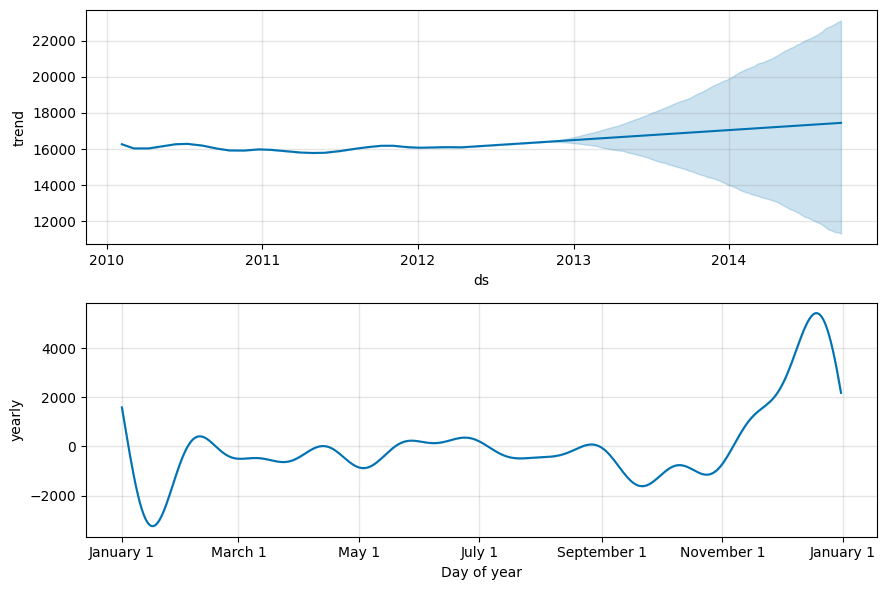

In [109]:
fig = modelo.plot_components(prediccion)


### Interpretación de los Resultados

1. **Tendencia**:
   - Asegúrate de que la tendencia del modelo se alinee con la tendencia observada en los datos reales. El modelo predice una tendencia ascendente muy minima a lo largo de los años (2do graficos), es posible decir que la ventas aumetnas pero no de manera notoria para la empresa 

2. **Estacionalidad**:
   - Como ya hemos visto existe una estacionalidad anual en los dos ultimos meses por los motivos ya analizados(mejor visto en el 3er grafico)

3. **Intervalos de Confianza**:
   - Se perciben unos intervalos de confianza estrechos por lo que estos sugieren mayor precisión en el modelo

4. **Picos y Caidas**:
   - El modelo repite bien los picos y caidas de los años anteriores en sus predicciones futuras

## Pasos a seguir:



+ Evaluación: Realiza predicciones y compara los resultados con los datos reales.

+ Evaluación Comparativa: Compara el rendimiento de los modelos ARIMA y Prophet usando las métricas de error.

+ Selección del Mejor Modelo: Cuál modelo ofrece el mejor rendimiento y es más adecuado para tus necesidades.

+ Predicciones Futuras: Usar el modelo seleccionado para hacer predicciones sobre datos futuros.

+ Intervalos de Confianza: Crear intervalos de confianza en las predicciones para medir la incertidumbre.

+ Revisión de Modelos: Implementación de modelos adicionales o técnicas avanzadas para mejorar las predicciones.

# Final

- **Consistencia General**: Las ventas son bastante estables durante la mayor parte del año, lo que indica que la tienda mantiene un flujo de clientes regular. Esto es positivo porque sugiere una base de clientes leal que sigue comprando a lo largo de los meses.

- **Picos de Fin de Año**: Notamos un aumento significativo en las ventas desde octubre hasta diciembre. Esto probablemente se debe a las compras navideñas y otras festividades que impulsan a la gente a gastar más. Es un periodo clave para la tienda, y probablemente representa una gran parte de sus ingresos anuales.

- **Declive Post-Fiestas**: Como mencionamos antes, enero ve una caída en las ventas. Esto es normal después de un periodo de compras intensivas, ya que los clientes están en modo de ahorro y recuperación financiera.

**Conclusión**: 

La tienda parece depender en gran medida del aumento de ventas de fin de año.

Mantener la consistencia durante los otros meses es crucial, pero la planificación estratégica para maximizar las ventas en el último trimestre es clave.

Sería útil para la tienda preparar promociones especiales o campañas de marketing dirigidas para aprovechar al máximo esos picos y suavizar un poco la caída en enero.

Referencia de estudio:

https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python

https://www.codificandobits.com/blog/guia-analisis-de-series-de-tiempo/